In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA
import math
import seaborn as sns

In [ ]:
upload = files.upload()

Saving smite_pca.xlsx to smite_pca.xlsx


In [ ]:
### Para que las gráficas se vean en 16:9
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [ ]:
smite = pd.read_excel('smite_pca.xlsx')
smite.head(10)

,God,Class,HP,Mana,Speed,Range,Attack/Sec,Power,Physical Protection,Magical Protection,HP5,MP5,Power Type
0,Tiamat,Mage,477,355,360,55.0,0.89,36,16,31,7.50,5.44,Magical
1,Achilles,Warrior,560,240,370,16.0,0.96,40,20,31,9.75,5.09,Physical
2,Agni,Mage,431,300,355,55.0,1.01,36,14,31,7.47,5.07,Magical
3,Ah Muzen Cab,Hunter,523,270,365,55.0,0.97,40,15,31,7.71,4.78,Physical
4,Ah Puch,Mage,475,320,365,55.0,0.87,37,12,31,6.45,5.32,Magical
5,Amaterasu,Warrior,565,255,375,12.0,1.01,41,21,31,8.80,5.20,Physical
6,Anhur,Hunter,538,255,365,55.0,0.92,43,14,31,8.69,4.82,Physical
7,Anubis,Mage,450,338,360,55.0,0.87,37,13,31,7.45,5.16,Magical
8,Ao Kuang,Mage,482,278,375,12.0,1.02,37,15,31,10.70,5.21,Magical
9,Aphrodite,Mage,448,283,355,55.0,0.88,33,12,31,6.45,5.21,Magical


In [ ]:
### Seleccionamos las características de interés
df = smite[['HP','Mana','Speed','Range','Attack/Sec','Power','Physical Protection','Magical Protection','HP5','MP5']]
df.head(10)

,HP,Mana,Speed,Range,Attack/Sec,Power,Physical Protection,Magical Protection,HP5,MP5
0,477,355,360,55.0,0.89,36,16,31,7.50,5.44
1,560,240,370,16.0,0.96,40,20,31,9.75,5.09
2,431,300,355,55.0,1.01,36,14,31,7.47,5.07
3,523,270,365,55.0,0.97,40,15,31,7.71,4.78
4,475,320,365,55.0,0.87,37,12,31,6.45,5.32
5,565,255,375,12.0,1.01,41,21,31,8.80,5.20
6,538,255,365,55.0,0.92,43,14,31,8.69,4.82
7,450,338,360,55.0,0.87,37,13,31,7.45,5.16
8,482,278,375,12.0,1.02,37,15,31,10.70,5.21
9,448,283,355,55.0,0.88,33,12,31,6.45,5.21


In [ ]:
df.describe()

,HP,Mana,Speed,Range,Attack/Sec,Power,Physical Protection,Magical Protection,HP5,MP5
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,113.000000,113.000000
mean,524.964602,267.787611,366.902655,32.809735,0.976106,38.628319,17.230088,31.0,8.178584,4.894602
std,51.182958,47.350602,6.560113,21.256335,0.053124,2.679934,4.470157,0.0,1.297612,0.723081
min,431.000000,0.000000,355.000000,12.000000,0.860000,26.000000,11.000000,31.0,5.430000,0.000000
25%,475.000000,240.000000,360.000000,12.000000,0.960000,37.000000,14.000000,31.0,7.450000,4.780000
50%,533.000000,264.000000,365.000000,16.000000,1.010000,40.000000,16.000000,31.0,8.670000,5.000000
75%,568.000000,285.000000,372.000000,55.000000,1.010000,41.000000,21.000000,31.0,8.800000,5.200000
max,614.000000,408.000000,381.000000,58.000000,1.070000,43.000000,41.000000,31.0,10.800000,5.940000


In [ ]:
pca = PCA(0.90)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
T = pca.transform(df)
# Comprobamos que se haya hecho la reducción de las dimensiones
print(df.shape) # Dimensiones del dataframe original
print(T.shape) # Dimensiones del nuevo grupo de datos

(113, 10)
(113, 2)


Vemos que se redujeron el número de columnas (dimensiones) de 10 a 2

In [ ]:
pca.explained_variance_ratio_

array([0.76517904, 0.16913828])

Con dos componentes principales se logra un 93% de explicabilidad, es decir, que con estas dos dimensiones se puede observar las correlaciones mas fuertes entre las dimensiones

**Interpretando resultados**

Se puede acceder a las correlaciones entre los componentes y las variables originales usando el método *components_* del objeto PCA() que ya tenemos

In [ ]:
components = pd.DataFrame(pca.components_, columns= df.columns, index=[1, 2])
# components = pd.DataFrame(pca.components_, columns= df.columns)
components

,HP,Mana,Speed,Range,Attack/Sec,Power,Physical Protection,Magical Protection,HP5,MP5
1,0.735668,-0.644707,0.046895,-0.196137,0.000165,0.018153,0.045477,0.0,0.006846,-0.005615
2,-0.641441,-0.761174,0.001634,0.092766,0.000185,-0.001091,-0.017811,0.0,0.002117,-0.015413


En un análisis rápido se puede intuir que las características más importantes en un personaje son HP y Mana, seguido ligeramente por Range

Text(0.5, 1.0, 'Matriz de correlación')

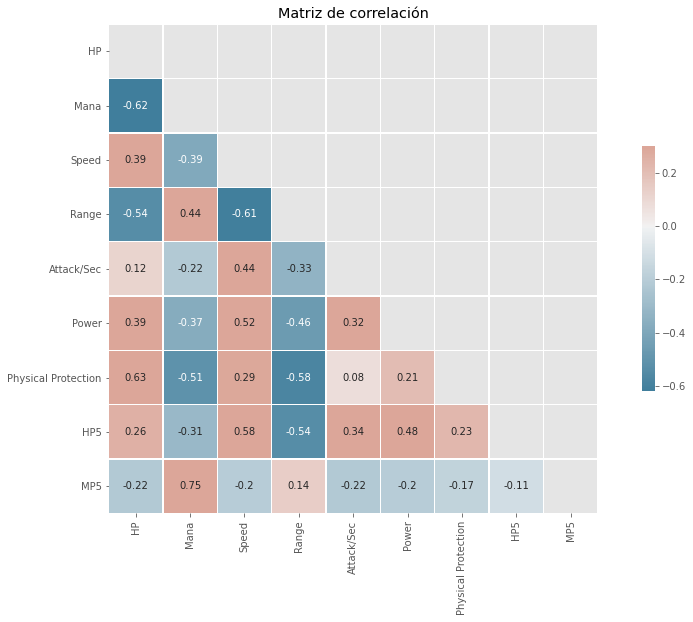

In [ ]:
# Creamos un dataframe temporal sin la columna Magical Protection
# Este valor al ser igual en todos los dioses, se asume que no aporta nada al análisis
dumy_df = smite
dumy_df = dumy_df.drop(["Magical Protection"], axis=1)

# Generamos una matriz de correlación
correlation_matrix = dumy_df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=correlation_matrix, annot=True, mask=mask, cmap=cmap, vmax=0.3,
            center=0,square=True, linewidths=0.5, cbar_kws={"shrink":0.5})
plt.title('Matriz de correlación')

Para el primer componente principal, el Ataque y el Ataque Especial es significativo, por lo tanto, este componente esta correlacionado con el Ataque y Ataque Especial, los pokemon con un valor alto en este componente tendrán un valor alto de estos atributos.

El segundo componente principal muestra un aumento cuando el valor de la Defensa y un decremento en la Velocidad. Pokemon con un valor alto en el segundo componente tendrán un atributo de Defensa alto, pero un atributo de Velocidad bajo.

In [ ]:
def get_important_features(transformed_features, components_, columns):
  """
  Esta función regresará las características más importantes
  para determinar cuáles tienen el mayor impacto en un arreglo
  multidimensional
  """
  num_columns = len(columns)

  # Se escalan los componentes principales por el valor
  # máximo en el set transformado perteneciente a ese componente
  xvector = components_[0] * max(transformed_features[:,0])
  yvector = components_[1] * max(transformed_features[:,1])

  # Acomoda cada columna de acuerdo a su longitu. Estos son las
  # columnas 'originales', no los componentes principales
  important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
  important_features = sorted(zip(important_features.values(), important_features.keys()),
                              reverse=True)
  print("Features by importance:\n", important_features)

In [ ]:
get_important_features(T, pca.components_, df.columns.values)

Features by importance:
 [(189.67702108017852, 'HP'), (187.10685611934485, 'Mana'), (44.48725120404203, 'Range'), (10.115648454025877, 'Physical Protection'), (9.971618566981675, 'Speed'), (3.8628489191428397, 'Power'), (2.8423897297129987, 'MP5'), (1.4975848110791692, 'HP5'), (0.046772274192878986, 'Attack/Sec'), (0.0, 'Magical Protection')]


Según nuestro análisis, el orden de importancia de las características es:


1.   HP
2.   Mana
3.   Range
4.   Physical Protection
5.   Speed
6.   Power
7. MP5
8. HP5
9. Attack/sec
10. Magical protection



Ahora lo visualizaremos en una gráfica

In [ ]:
def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

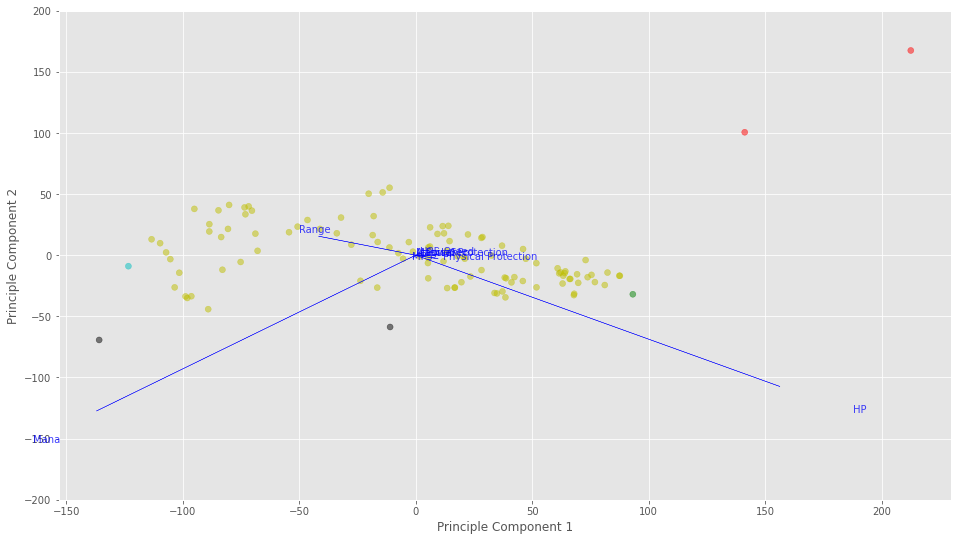

In [ ]:
ax = draw_vectors(T, pca.components_, df.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
# Mejores dioses
T_df.loc[T_df['component1'] > 90, 'color'] = 'g'
T_df.loc[T_df['component2'] > 100 , 'color'] = 'r'

# Peores dioses
T_df.loc[T_df['component1'] < -120, 'color'] = 'c'
T_df.loc[T_df['component2'] < -50, 'color'] = 'k'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.ylim([-200,200])
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

In [ ]:
### Mejores dioses según el primer componente principal
print(smite.loc[T_df[T_df['color'] == 'g'].index])

      God     Class   HP  Mana  ...  Magical Protection  HP5  MP5  Power Type
110  Ymir  Guardian  614   232  ...                  31  8.9  4.9     Magical

[1 rows x 13 columns]


In [ ]:
### Mejores dioses según el segundo componente principal
print(smite.loc[T_df[T_df['color'] == 'r'].index])

            God     Class   HP  Mana  ...  Magical Protection   HP5  MP5  Power Type
33   Cu Culainn   Warrior  565   100  ...                  31  7.75  0.0    Physical
109      Yemoja  Guardian  585     0  ...                  31  6.70  0.0     Magical

[2 rows x 13 columns]


In [ ]:
### Peores dioses según el primer componente principal
print(smite.loc[T_df[T_df['color'] == 'c'].index])

       God Class   HP  Mana  ...  Magical Protection   HP5  MP5  Power Type
88  Scylla  Mage  440   354  ...                  31  6.45  5.3     Magical

[1 rows x 13 columns]


In [ ]:
### Peores dioses seún el segundo componente principal
print(smite.loc[T_df[T_df['color'] == 'k'].index])

      God Class   HP  Mana  ...  Magical Protection   HP5   MP5  Power Type
46  Hades  Mage  560   318  ...                  31  5.54  5.36     Magical
57  Janus  Mage  470   408  ...                  31  6.45  5.45     Magical

[2 rows x 13 columns]


In [ ]:
smite.iloc[33]

God                    Cu Culainn
Class                     Warrior
HP                            565
Mana                          100
Speed                         370
Range                          16
Attack/Sec                   1.01
Power                          41
Physical Protection            20
Magical Protection             31
HP5                          7.75
MP5                             0
Power Type               Physical
Name: 33, dtype: object

In [ ]:
smite.iloc[109]

God                      Yemoja
Class                  Guardian
HP                          585
Mana                          0
Speed                       365
Range                        55
Attack/Sec                 1.01
Power                        36
Physical Protection          22
Magical Protection           31
HP5                         6.7
MP5                           0
Power Type              Magical
Name: 109, dtype: object

In [ ]:
smite.iloc[110]

God                        Ymir
Class                  Guardian
HP                          614
Mana                        232
Speed                       370
Range                        12
Attack/Sec                 0.86
Power                        40
Physical Protection          26
Magical Protection           31
HP5                         8.9
MP5                         4.9
Power Type              Magical
Name: 110, dtype: object

In [ ]:
smite.iloc[88]

God                     Scylla
Class                     Mage
HP                         440
Mana                       354
Speed                      355
Range                       55
Attack/Sec                1.01
Power                       35
Physical Protection         12
Magical Protection          31
HP5                       6.45
MP5                        5.3
Power Type             Magical
Name: 88, dtype: object

In [ ]:
smite.iloc[46]

God                      Hades
Class                     Mage
HP                         560
Mana                       318
Speed                      365
Range                       55
Attack/Sec                0.96
Power                       34
Physical Protection         21
Magical Protection          31
HP5                       5.54
MP5                       5.36
Power Type             Magical
Name: 46, dtype: object

In [ ]:
smite.iloc[57]

God                      Janus
Class                     Mage
HP                         470
Mana                       408
Speed                      360
Range                       55
Attack/Sec                1.01
Power                       35
Physical Protection         11
Magical Protection          31
HP5                       6.45
MP5                       5.45
Power Type             Magical
Name: 57, dtype: object